In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn import feature_selection
import seaborn as sns
import pickle
%matplotlib inline

In [2]:
# Function to read all the datasets
def read_all(template,start,end):
    frames = [ pd.read_json(f).fillna(0) for f in [template.format(i) for i in range(start,end)] ]
    X = pd.concat(frames, ignore_index = True,sort = True)
    return X

In [3]:
template = "datasets/dataset_processed_2.1/dataset_{:02}.json"
df = read_all(template,0,25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Columns: 167 entries, Ak47_ct to t_leads
dtypes: float64(1), int64(159), object(7)
memory usage: 156.0+ MB


In [5]:
# colwep = ['Ak47_ct', 'Ak47_t', 'Aug_ct', 'Aug_t', 'Awp_ct', 'Awp_t', 'C4_t', 'Cz75Auto_ct',\
#           'Cz75Auto_t', 'Deagle_ct', 'Deagle_t', 'DecoyGrenade_ct', 'DecoyGrenade_t', 'Flashbang_ct',\
#           'Flashbang_t', 'Glock_ct', 'Glock_t', 'HeGrenade_ct', 'HeGrenade_t', 'M4a4_ct', 'M4a4_t',\
#           'IncendiaryGrenade_ct', 'IncendiaryGrenade_t', 'Mp9_ct', 'Mp9_t', 'P2000_ct',\
#           'P2000_t', 'P250_ct', 'P250_t', 'Sg553_ct', 'Sg553_t', 'SmokeGrenade_ct', 'SmokeGrenade_t',\
#           'UspS_ct', 'UspS_t','MolotovGrenade_ct', 'MolotovGrenade_t']

# # colwep = ['Ak47_ct', 'Ak47_t', 'Aug_ct', 'Aug_t', 'Awp_ct', 'Awp_t', 'C4_t',\
# #           'Deagle_ct', 'Deagle_t', 'Flashbang_ct',\
# #           'Flashbang_t', 'Glock_ct', 'Glock_t', 'HeGrenade_ct', 'HeGrenade_t', 'M4a4_ct', 'M4a4_t',\
# #           'MolotovIancendiaryGrenade_ct', 'MolotovIncendiaryGrenade_t', 'P2000_ct',\
# #           'P2000_t', 'P250_ct', 'P250_t', 'Sg553_ct', 'Sg553_t', 'SmokeGrenade_ct', 'SmokeGrenade_t',\
# #           'UspS_ct', 'UspS_t']

# colpla = ['alive_players_ct', 'alive_players_t', 'armor_ct1_Bin_Code', 'armor_ct2_Bin_Code',\
#           'armor_ct3_Bin_Code', 'armor_ct4_Bin_Code', 'armor_ct5_Bin_Code', 'armor_ct_Bin_Code',\
#           'armor_t1_Bin_Code', 'armor_t2_Bin_Code', 'armor_t3_Bin_Code', 'armor_t4_Bin_Code',\
#           'armor_t5_Bin_Code', 'armor_t_Bin_Code','defuse_kit_ct1', 'defuse_kit_ct2',\
#           'defuse_kit_ct3', 'defuse_kit_ct4', 'defuse_kit_ct5','defuse_kit_ct', \
#           'has_helmet_ct1', 'has_helmet_ct2', 'has_helmet_ct3', 'has_helmet_ct4', 'has_helmet_ct5', \
#           'has_helmet_ct','has_helmet_t1', 'has_helmet_t2', 'has_helmet_t3', 'has_helmet_t4',\
#           'has_helmet_t5','has_helmet_t', 'health_ct1_Bin_Code', 'health_ct2_Bin_Code', \
#           'health_ct3_Bin_Code', 'health_ct4_Bin_Code', 'health_ct5_Bin_Code','health_ct_Bin_Code',\
#           'health_t1_Bin_Code', 'health_t2_Bin_Code', 'health_t3_Bin_Code', 'health_t4_Bin_Code',\
#           'health_t5_Bin_Code','health_t_Bin_Code','money_ct1_Bin_Code', 'money_ct2_Bin_Code',\
#           'money_ct3_Bin_Code', 'money_ct4_Bin_Code', 'money_ct5_Bin_Code', \
#           'money_ct_Bin_Code', 'money_t1_Bin_Code', 'money_t2_Bin_Code', 'money_t3_Bin_Code', \
#           'money_t4_Bin_Code', 'money_t5_Bin_Code', 'money_t_Bin_Code']

# colsta = ['current_score_ct', 'current_score_t','t_leads','round_status_BombPlanted',\
#           'round_status_FreezeTime', 'round_status_Normal', 'round_status_time_left']

# colkill = ['kwct_Ak47', 'kwct_Aug', 'kwct_Awp', 'kwct_C4', 'kwct_Cz75Auto', 'kwct_Deagle',\
#            'kwct_Flashbang', 'kwct_Glock', 'kwct_HeGrenade', 'kwct_Knife', 'kwct_M4a4',\
#            'kwct_MolotovIncendiaryGrenade', 'kwct_Mp9', 'kwct_P2000', 'kwct_P250', 'kwct_Sg553',\
#            'kwct_SmokeGrenade', 'kwct_UspS', 'kwct_other_heavy', 'kwct_other_pistols',\
#            'kwct_other_rifles', 'kwct_other_smgs', 'kwct_other_utils', 'kwct_other_world', 'kwt_Ak47',\
#            'kwt_Aug', 'kwt_Awp', 'kwt_C4', 'kwt_Cz75Auto', 'kwt_Deagle', 'kwt_Flashbang', 'kwt_Glock',\
#            'kwt_HeGrenade', 'kwt_Knife', 'kwt_M4a4', 'kwt_MolotovIncendiaryGrenade', 'kwt_Mp9',\
#            'kwt_P2000', 'kwt_P250', 'kwt_Sg553', 'kwt_SmokeGrenade', 'kwt_UspS', 'kwt_other_heavy',\
#            'kwt_other_pistols', 'kwt_other_rifles', 'kwt_other_smgs', 'kwt_other_utils',\
#            'kwt_other_world']

# colmap = ['map_de_dust2', 'map_de_inferno', 'map_de_mirage', 'map_de_nuke', 'map_de_overpass',\
#           'map_de_train', 'map_de_vertigo','map_de_cache']

# # colpos = ['pos_bs_ct1', 'pos_bs_ct2', 'pos_bs_ct3', 'pos_bs_ct4', 'pos_bs_ct5', 'pos_bs_t1',\
# #           'pos_bs_t2', 'pos_bs_t3', 'pos_bs_t4', 'pos_bs_t5']

# colpos = ['pos_bs_ct1', 'pos_bs_ct2', 'pos_bs_ct3', 'pos_bs_ct4', 'pos_bs_ct5', 'pos_bs_t1',\
#           'pos_bs_t2', 'pos_bs_t3', 'pos_bs_t4', 'pos_bs_t5', 'pr_ct1','pr_ct2', 'pr_ct3',\
#           'pr_ct4', 'pr_ct5', 'pr_t1', 'pr_t2', 'pr_t3', 'pr_t4', 'pr_t5']

# # cols = colpla+colmap+colwep
# cols = colpla+colmap+colwep+colsta+colpos

# imp_cols = ['alive_players_ct', 'alive_players_t', 'armor_ct1_Bin_Code', 'armor_ct2_Bin_Code',\
#             'armor_ct3_Bin_Code', 'armor_ct4_Bin_Code', 'armor_ct5_Bin_Code', 'armor_ct_Bin_Code',\
#             'armor_t1_Bin_Code', 'armor_t2_Bin_Code', 'armor_t3_Bin_Code', 'armor_t4_Bin_Code',\
#             'armor_t5_Bin_Code', 'armor_t_Bin_Code', 'defuse_kit_ct1', 'defuse_kit_ct2',\
#             'defuse_kit_ct3', 'defuse_kit_ct4', 'defuse_kit_ct5', 'defuse_kit_ct', 'has_helmet_ct1',\
#             'has_helmet_ct2', 'has_helmet_ct3', 'has_helmet_ct4', 'has_helmet_ct5', 'has_helmet_ct',\
#             'has_helmet_t1', 'has_helmet_t2', 'has_helmet_t3', 'has_helmet_t4', 'has_helmet_t5',\
#             'has_helmet_t', 'health_ct1_Bin_Code', 'health_ct2_Bin_Code', 'health_ct3_Bin_Code',\
#             'health_ct4_Bin_Code', 'health_ct5_Bin_Code', 'health_ct_Bin_Code', 'health_t1_Bin_Code',\
#             'health_t2_Bin_Code', 'health_t3_Bin_Code', 'health_t4_Bin_Code', 'health_t5_Bin_Code',\
#             'health_t_Bin_Code', 'money_ct1_Bin_Code', 'money_ct2_Bin_Code', 'money_ct3_Bin_Code',\
#             'money_ct4_Bin_Code', 'money_ct5_Bin_Code', 'money_ct_Bin_Code', 'money_t1_Bin_Code',\
#             'money_t2_Bin_Code', 'money_t3_Bin_Code', 'money_t4_Bin_Code', 'money_t5_Bin_Code',\
#             'money_t_Bin_Code', 'map_de_dust2', 'map_de_inferno', 'map_de_mirage', 'map_de_nuke',\
#             'map_de_overpass', 'map_de_train', 'map_de_vertigo', 'Ak47_ct', 'Ak47_t', 'Aug_ct',\
#             'Awp_ct', 'Awp_t', 'C4_t', 'Cz75Auto_ct', 'Deagle_ct', 'Deagle_t', 'Flashbang_ct',\
#             'Flashbang_t', 'Glock_t', 'HeGrenade_ct', 'HeGrenade_t', 'M4a4_ct',\
#             'IncendiaryGrenade_ct', 'IncendiaryGrenade_t', 'Mp9_ct', 'P2000_ct',\
#             'P250_ct', 'P250_t', 'Sg553_ct', 'Sg553_t', 'SmokeGrenade_ct', 'SmokeGrenade_t',\
#             'UspS_ct','MolotovGrenade_ct', 'MolotovGrenade_t']
# non_imp_cols = [ 'Aug_t', 'C4_t', 'Cz75Auto_t',\
#                 'DecoyGrenade_ct', 'DecoyGrenade_t', 'Glock_ct', 'M4a4_t', 'IncendiaryGrenade_t',\
#                 'Mp9_ct', 'Mp9_t', 'P2000_t', 'UspS_t', 'MolotovGrenade_ct',\
#                 'round_status_FreezeTime']
# # for col in non_imp_cols:
# #     cols.remove(col)
# # cols = imp_cols

In [6]:
# colwep = ['Ak47_ct', 'Ak47_t', 'Aug_ct', 'Aug_t', 'Awp_ct', 'Awp_t', 'C4_t', 'Cz75Auto_ct',\
#           'Cz75Auto_t', 'Deagle_ct', 'Deagle_t', 'DecoyGrenade_ct', 'DecoyGrenade_t', 'Flashbang_ct',\
#           'Flashbang_t', 'Glock_ct', 'Glock_t', 'HeGrenade_ct', 'HeGrenade_t', 'M4a4_ct', 'M4a4_t',\
#           'IncendiaryGrenade_ct', 'IncendiaryGrenade_t', 'Mp9_ct', 'Mp9_t', 'P2000_ct',\
#           'P2000_t', 'P250_ct', 'P250_t', 'Sg553_ct', 'Sg553_t', 'SmokeGrenade_ct', 'SmokeGrenade_t',\
#           'UspS_ct', 'UspS_t','MolotovGrenade_ct', 'MolotovGrenade_t']

# colpla = ['alive_players_ct', 'alive_players_t', 'armor_ct1', 'armor_ct2',\
#           'armor_ct3', 'armor_ct4', 'armor_ct5', 'armor_ct',\
#           'armor_t1', 'armor_t2', 'armor_t3', 'armor_t4',\
#           'armor_t5', 'armor_t','defuse_kit_ct1', 'defuse_kit_ct2',\
#           'defuse_kit_ct3', 'defuse_kit_ct4', 'defuse_kit_ct5','defuse_kit_ct', \
#           'has_helmet_ct1', 'has_helmet_ct2', 'has_helmet_ct3', 'has_helmet_ct4', 'has_helmet_ct5', \
#           'has_helmet_ct','has_helmet_t1', 'has_helmet_t2', 'has_helmet_t3', 'has_helmet_t4',\
#           'has_helmet_t5','has_helmet_t', 'health_ct1', 'health_ct2', \
#           'health_ct3', 'health_ct4', 'health_ct5','health_ct',\
#           'health_t1', 'health_t2', 'health_t3', 'health_t4',\
#           'health_t5','health_t','money_ct1', 'money_ct2',\
#           'money_ct3', 'money_ct4', 'money_ct5', \
#           'money_ct', 'money_t1', 'money_t2', 'money_t3', \
#           'money_t4', 'money_t5', 'money_t']

# colsta = ['current_score_ct', 'current_score_t','t_leads','round_status_BombPlanted',\
#           'round_status_FreezeTime', 'round_status_Normal', 'round_status_time_left']

# colmap = ['map_de_dust2', 'map_de_inferno', 'map_de_mirage', 'map_de_nuke', 'map_de_overpass',\
#           'map_de_train', 'map_de_vertigo','map_de_cache']

# colpos = ['pos_bs_ct1', 'pos_bs_ct2', 'pos_bs_ct3', 'pos_bs_ct4', 'pos_bs_ct5', 'pos_bs_t1',\
#           'pos_bs_t2', 'pos_bs_t3', 'pos_bs_t4', 'pos_bs_t5', 'pr_ct1','pr_ct2', 'pr_ct3',\
#           'pr_ct4', 'pr_ct5', 'pr_t1', 'pr_t2', 'pr_t3', 'pr_t4', 'pr_t5']

# # cols = colpla+colmap+colwep
# all_cols = colpla+colmap+colwep+colsta+colpos

# imp_cols = ['alive_players_ct', 'alive_players_t', 'armor_ct1', 'armor_ct2',\
#             'armor_ct3', 'armor_ct4', 'armor_ct5', 'armor_ct',\
#             'armor_t1', 'armor_t2', 'armor_t3', 'armor_t4',\
#             'armor_t5', 'armor_t', 'defuse_kit_ct1', 'defuse_kit_ct2',\
#             'defuse_kit_ct3', 'defuse_kit_ct4', 'defuse_kit_ct5', 'defuse_kit_ct', 'has_helmet_ct1',\
#             'has_helmet_ct2', 'has_helmet_ct3', 'has_helmet_ct4', 'has_helmet_ct5', 'has_helmet_ct',\
#             'has_helmet_t1', 'has_helmet_t2', 'has_helmet_t3', 'has_helmet_t4', 'has_helmet_t5',\
#             'has_helmet_t', 'health_ct1', 'health_ct2', 'health_ct3',\
#             'health_ct4', 'health_ct5', 'health_ct', 'health_t1',\
#             'health_t2', 'health_t3', 'health_t4', 'health_t5',\
#             'health_t', 'money_ct1', 'money_ct2', 'money_ct3',\
#             'money_ct4', 'money_ct5', 'money_ct', 'money_t1',\
#             'money_t2', 'money_t3', 'money_t4', 'money_t5',\
#             'money_t', 'map_de_dust2', 'map_de_inferno', 'map_de_mirage', 'map_de_nuke',\
#             'map_de_overpass', 'map_de_train', 'map_de_vertigo', 'Ak47_ct', 'Ak47_t', 'Aug_ct',\
#             'Awp_ct', 'Awp_t', 'C4_t', 'Cz75Auto_ct', 'Deagle_ct', 'Deagle_t', 'Flashbang_ct',\
#             'Flashbang_t', 'Glock_t', 'HeGrenade_ct', 'HeGrenade_t', 'M4a4_ct',\
#             'IncendiaryGrenade_ct', 'IncendiaryGrenade_t', 'Mp9_ct', 'P2000_ct',\
#             'P250_ct', 'P250_t', 'Sg553_ct', 'Sg553_t', 'SmokeGrenade_ct', 'SmokeGrenade_t',\
#             'UspS_ct','MolotovGrenade_ct', 'MolotovGrenade_t']
# non_imp_cols = [ 'Aug_t', 'C4_t', 'Cz75Auto_t',\
#                 'DecoyGrenade_ct', 'DecoyGrenade_t', 'Glock_ct', 'M4a4_t', 'IncendiaryGrenade_t',\
#                 'Mp9_ct', 'Mp9_t', 'P2000_t', 'UspS_t', 'MolotovGrenade_ct',\
#                 'round_status_FreezeTime']
# # for col in non_imp_cols:
# #     cols.remove(col)
# # cols = imp_cols
# cols = best_cols_v2

In [7]:
cols = pickle.load(open('best_cols_v2.pickle','rb'))

In [8]:
scaler = StandardScaler()
Y_all = df['round_winner_t']
X_all = df.drop(columns='round_winner_t',axis=1)[cols]
X_all = scaler.fit_transform(X_all) 

In [9]:
print("Dataset shape: ",X_all.shape)

Dataset shape:  (122410, 92)


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all,test_size=0.125,random_state=562)

In [11]:
XY_data = [X_train, X_test, Y_train, Y_test]

In [12]:
def GrCV(param,clf,XY_data):
    [X_train, X_test, Y_train, Y_test] = XY_data
    clf.fit(X_train,Y_train)
    Y_train_pred = clf.predict(X_train)
    Y_test_pred = clf.predict(X_test)
    print("Default Training Accuracy = {}".format(accuracy_score(Y_train_pred,Y_train)))
    print("Default Test Accuracy = {}".format(accuracy_score(Y_test_pred,Y_test)))
    cv_split = ShuffleSplit(n_splits = 5, test_size = .175, random_state = 100 )
    best_model = GridSearchCV(estimator = clf, param_grid = param, cv = cv_split,\
                              scoring = 'neg_mean_squared_error')
    best_model.fit(X_train, Y_train)
    best_param = best_model.best_params_
    print("Best parameters are : {}".format(best_param))
    clf.set_params(**best_param)
    clf.fit(X_train, Y_train)
    Y_train_pred = clf.predict(X_train)
    Y_test_pred = clf.predict(X_test)
    print("Training Accuracy = {}".format(accuracy_score(Y_train_pred,Y_train)))
    print("Test Accuracy = {}".format(accuracy_score(Y_test_pred,Y_test)))
    return clf

In [13]:
def train_predict(clf,XY_data):
    [X_train, X_test, Y_train, Y_test] = XY_data
    clf.fit(X_train,Y_train)
    Y_train_pred = clf.predict(X_train)
    Y_test_pred = clf.predict(X_test)
    print("Default Training Accuracy = {}".format(accuracy_score(Y_train_pred,Y_train)))
    print("Default Test Accuracy = {}".format(accuracy_score(Y_test_pred,Y_test)))

In [19]:
param = {
#     'criterion': ['gini', 'entropy'],
#     'bootstrap': [False,True],
#     'oob_score': [True,False],
#     'splitter' : ['best','random'],
#     'min_samples_split' : range(2,11,2),
#     'min_samples_leaf' : range(1,10,2),
#     'max_features' : range(12,15,2),
    'max_depth': [37],
    'n_estimators': [200]
}
clf_et = ExtraTreesClassifier(verbose=2)
# model_data = pickle.load(open('best_model.pickle','rb'))
# cols = model_data['columns']
# clf_et = model_data['clf']
clf_et.n_jobs=-1
# clf_et = pickle.load(open('et_best.pickle','rb'))['clf']
clf_et.n_estimators = 1000
clf_et.max_depth = 37
# clf_et.ccp_alpha = 1.2420578323338789e-05
# clf_et = GrCV(param,clf_et,XY_data)
train_predict(clf_et,[X_all, X_test, Y_all, Y_test])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 1000building tree 2 of 1000

building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000building tree 8 of 1000

building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000

building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s


building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000
building tree 61 of 1000
building tree 62 of 1000
building tree 63 of 1000
building tree 64 of 1000
building tree 65 of 1000
building tree 66 of 1000
building tree 67 of 1000
building tree 68 of 1000
building tree 69 of 1000
building tree 70 of 1000
building tree 71 of 1000
building tree 72 of 1000


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   13.5s



building tree 157 of 1000
building tree 158 of 1000
building tree 159 of 1000
building tree 160 of 1000
building tree 161 of 1000
building tree 162 of 1000
building tree 163 of 1000
building tree 164 of 1000
building tree 165 of 1000
building tree 166 of 1000
building tree 167 of 1000
building tree 168 of 1000
building tree 169 of 1000
building tree 170 of 1000
building tree 171 of 1000
building tree 172 of 1000
building tree 173 of 1000
building tree 174 of 1000
building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000
building tree 182 of 1000
building tree 183 of 1000
building tree 184 of 1000
building tree 185 of 1000
building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000
building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000
building tree 193 of 1000
building tree 194 of 1000
building tr

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   32.2s



building tree 359 of 1000
building tree 360 of 1000
building tree 361 of 1000
building tree 362 of 1000
building tree 363 of 1000
building tree 364 of 1000
building tree 365 of 1000
building tree 366 of 1000
building tree 367 of 1000
building tree 368 of 1000
building tree 369 of 1000
building tree 370 of 1000
building tree 371 of 1000
building tree 372 of 1000
building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000
building tree 376 of 1000
building tree 377 of 1000
building tree 378 of 1000
building tree 379 of 1000
building tree 380 of 1000
building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000
building tree 384 of 1000building tree 385 of 1000

building tree 386 of 1000
building tree 387 of 1000
building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000
building tree 396 of 1000
building tr

[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   58.8s


building tree 644 of 1000
building tree 645 of 1000
building tree 646 of 1000
building tree 647 of 1000
building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tre

building tree 960 of 1000
building tree 961 of 1000
building tree 962 of 1000
building tree 963 of 1000
building tree 964 of 1000
building tree 965 of 1000
building tree 966 of 1000
building tree 967 of 1000
building tree 968 of 1000
building tree 969 of 1000
building tree 970 of 1000
building tree 971 of 1000
building tree 972 of 1000
building tree 973 of 1000
building tree 974 of 1000
building tree 975 of 1000
building tree 976 of 1000
building tree 977 of 1000
building tree 978 of 1000
building tree 979 of 1000
building tree 980 of 1000
building tree 981 of 1000
building tree 982 of 1000
building tree 983 of 1000
building tree 984 of 1000
building tree 985 of 1000
building tree 986 of 1000
building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000
building tree 992 of 1000
building tree 993 of 1000
building tree 994 of 1000
building tree 995 of 1000
building tree 996 of 1000
building tree 997 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.6min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    2.0s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    4.3s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:    7.4s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:   11.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:    0.9s


Default Training Accuracy = 0.9970917408708438
Default Test Accuracy = 0.9965364004705267


[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    1.4s finished


In [20]:
model_data = {'clf':clf_et,'columns':cols,'scaler':scaler}

In [21]:
pickle_out = open('best_model_v2.pickle','wb')
pickle.dump(model_data,pickle_out)
pickle_out.close()

In [91]:
# cv_split = ShuffleSplit(n_splits = 5, test_size = .125, train_size = .87, random_state = 1386 )
# model_rfe = feature_selection.RFECV(clf_et, step = 1, scoring = 'neg_mean_absolute_error', \
#                                     cv = cv_split)
# model_rfe.fit(X_all, Y_all)

In [39]:
# best_cols = list(np.array(cols)[model_rfe.get_support()])

In [83]:
model_data = pickle.load(open('best_model.pickle','rb'))
cols = model_data['columns']
clf_et = model_data['clf']
clf_et.verbose=1

In [ ]:
len(model_data['columns'])

In [80]:
best_cols_v2 = ['alive_players_ct', 'alive_players_t', 'armor_ct1', 'armor_ct2', 'armor_ct3',\
                'armor_ct4', 'armor_ct5', 'armor_ct', 'armor_t1', 'armor_t2', 'armor_t3',\
                'armor_t4', 'armor_t5', 'armor_t', 'defuse_kit_ct1', 'defuse_kit_ct2',\
                'defuse_kit_ct3', 'defuse_kit_ct4', 'defuse_kit_ct5', 'defuse_kit_ct',\
                'has_helmet_ct1', 'has_helmet_ct2', 'has_helmet_ct3', 'has_helmet_ct4',\
                'has_helmet_ct5', 'has_helmet_ct', 'has_helmet_t1', 'has_helmet_t2',\
                'has_helmet_t3', 'has_helmet_t4', 'has_helmet_t5', 'has_helmet_t',\
                'health_ct1', 'health_ct2', 'health_ct3', 'health_ct4', 'health_ct5', 'health_ct',\
                'health_t1', 'health_t2', 'health_t3', 'health_t4', 'health_t5','health_t',\
                'money_ct1', 'money_ct2', 'money_ct3', 'money_ct4', 'money_ct5', 'money_ct',\
                'money_t1', 'money_t2', 'money_t3', 'money_t4', 'money_t5', 'money_t',\
                'map_de_dust2', 'map_de_inferno', 'map_de_mirage', 'map_de_nuke', 'map_de_train',\
                'Ak47_ct', 'Ak47_t', 'Aug_ct', 'Awp_ct', 'Awp_t', 'C4_t', 'Cz75Auto_ct',\
                'Deagle_ct', 'Deagle_t', 'Flashbang_ct', 'Flashbang_t', 'Glock_t', 'HeGrenade_ct',\
                'HeGrenade_t', 'M4a4_ct', 'IncendiaryGrenade_ct', 'P2000_ct', 'P250_ct',\
                'P250_t', 'Sg553_ct', 'Sg553_t', 'SmokeGrenade_ct', 'SmokeGrenade_t', 'UspS_ct',\
                'MolotovGrenade_t', 'current_score_ct', 'current_score_t', 't_leads',\
                'round_status_BombPlanted', 'round_status_Normal', 'round_status_time_left',\
                ]

In [55]:
worst_cols = [col for col in all_cols if col not in best_cols]
worst_cols

['health_ct1',
 'health_ct2',
 'health_t1',
 'health_t5',
 'map_de_overpass',
 'map_de_vertigo',
 'map_de_cache',
 'Aug_t',
 'Cz75Auto_t',
 'DecoyGrenade_ct',
 'DecoyGrenade_t',
 'Glock_ct',
 'M4a4_t',
 'IncendiaryGrenade_t',
 'Mp9_ct',
 'Mp9_t',
 'P2000_t',
 'UspS_t',
 'MolotovGrenade_ct',
 'round_status_FreezeTime',
 'pr_ct1',
 'pr_ct3',
 'pr_ct4',
 'pr_ct5',
 'pr_t4',
 'pr_t5']

In [21]:
import sys
sys.getsizeof(cols)

792

In [27]:
[X_train, X_test, Y_train, Y_test] = XY_data
Y_train_pred = clf_rf.predict(X_train)
Y_test_pred = clf_rf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


In [207]:
1-np.mean(np.abs(Y_test_pred-Y_test))

0.8566841415465268

Feature: 0, Score: 0.00948 alive_players_ct
Feature: 1, Score: 0.00928 alive_players_t
Feature: 2, Score: 0.00916 armor_ct1
Feature: 3, Score: 0.01222 armor_ct2
Feature: 4, Score: 0.01829 armor_ct3
Feature: 5, Score: 0.02071 armor_ct4
Feature: 6, Score: 0.01286 armor_ct5
Feature: 7, Score: 0.02346 armor_ct
Feature: 8, Score: 0.01038 armor_t1
Feature: 9, Score: 0.01515 armor_t2
Feature: 10, Score: 0.01518 armor_t3
Feature: 11, Score: 0.01412 armor_t4
Feature: 12, Score: 0.00916 armor_t5
Feature: 13, Score: 0.01809 armor_t
Feature: 14, Score: 0.00673 defuse_kit_ct1
Feature: 15, Score: 0.00683 defuse_kit_ct2
Feature: 16, Score: 0.00794 defuse_kit_ct3
Feature: 17, Score: 0.00770 defuse_kit_ct4
Feature: 18, Score: 0.00606 defuse_kit_ct5
Feature: 19, Score: 0.01328 defuse_kit_ct
Feature: 20, Score: 0.00670 has_helmet_ct1
Feature: 21, Score: 0.00845 has_helmet_ct2
Feature: 22, Score: 0.00941 has_helmet_ct3
Feature: 23, Score: 0.00827 has_helmet_ct4
Feature: 24, Score: 0.00670 has_helmet_ct5
F

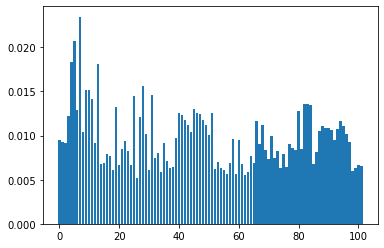

In [56]:
import matplotlib.pyplot as plt
importance = clf_et.feature_importances_
# summarize feature importance
imp_cols = []
non_imp_cols = []
threshold = 0.003
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v),cols[i])
    if (v>threshold):
        imp_cols.append(cols[i])
    else:
        non_imp_cols.append(cols[i])
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [57]:
imp_cols

['alive_players_ct',
 'alive_players_t',
 'armor_ct1',
 'armor_ct2',
 'armor_ct3',
 'armor_ct4',
 'armor_ct5',
 'armor_ct',
 'armor_t1',
 'armor_t2',
 'armor_t3',
 'armor_t4',
 'armor_t5',
 'armor_t',
 'defuse_kit_ct1',
 'defuse_kit_ct2',
 'defuse_kit_ct3',
 'defuse_kit_ct4',
 'defuse_kit_ct5',
 'defuse_kit_ct',
 'has_helmet_ct1',
 'has_helmet_ct2',
 'has_helmet_ct3',
 'has_helmet_ct4',
 'has_helmet_ct5',
 'has_helmet_ct',
 'has_helmet_t1',
 'has_helmet_t2',
 'has_helmet_t3',
 'has_helmet_t4',
 'has_helmet_t5',
 'has_helmet_t',
 'health_ct3',
 'health_ct4',
 'health_ct5',
 'health_ct',
 'health_t2',
 'health_t3',
 'health_t4',
 'health_t',
 'money_ct1',
 'money_ct2',
 'money_ct3',
 'money_ct4',
 'money_ct5',
 'money_ct',
 'money_t1',
 'money_t2',
 'money_t3',
 'money_t4',
 'money_t5',
 'money_t',
 'map_de_dust2',
 'map_de_inferno',
 'map_de_mirage',
 'map_de_nuke',
 'map_de_train',
 'Ak47_ct',
 'Ak47_t',
 'Aug_ct',
 'Awp_ct',
 'Awp_t',
 'C4_t',
 'Cz75Auto_ct',
 'Deagle_ct',
 'Deagle_t'

In [58]:
non_imp_cols

[]

In [193]:
RandomForestClassifier?